<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/Multi_Variate_Time_Series_Forecasting_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime

# Load data

In [272]:
energy_cvs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sertificate_preparation/TimeSeries/energy_dataset.csv')
energy_cvs.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [273]:
multivar_df = energy_cvs[['time','total load actual', 'price actual','total load forecast']]
multivar_df.head()

,time,total load actual,price actual,total load forecast
0,2015-01-01 00:00:00+01:00,25385.0,65.41,26118.0
1,2015-01-01 01:00:00+01:00,24382.0,64.92,24934.0
2,2015-01-01 02:00:00+01:00,22734.0,64.48,23515.0
3,2015-01-01 03:00:00+01:00,21286.0,59.32,22642.0
4,2015-01-01 04:00:00+01:00,20264.0,56.04,21785.0


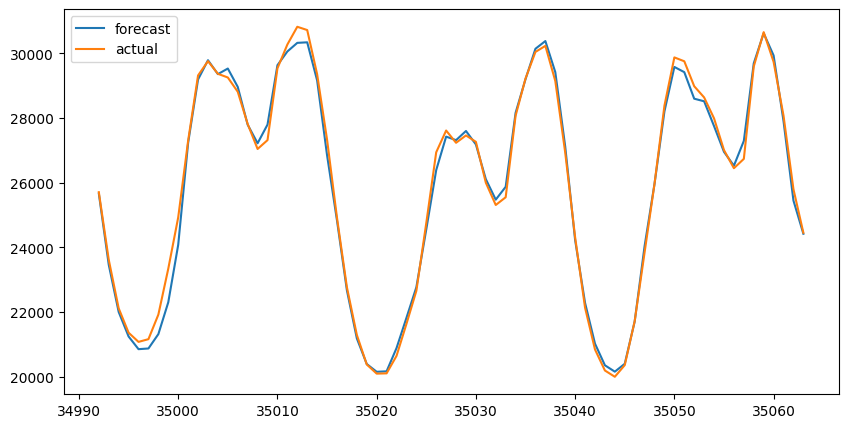

In [274]:
timesteps = np.arange(multivar_df.shape[0])

plt.figure(figsize=(10,5))
plt.plot(timesteps[-72:], multivar_df['total load forecast'][-72:])
plt.plot(timesteps[-72:], multivar_df['total load actual'][-72:])
plt.legend(['forecast', 'actual'])
plt.show()


In [275]:
multivar_df.isna().sum()

time                    0
total load actual      36
price actual            0
total load forecast     0
dtype: int64

In [276]:
multivar_df[multivar_df['total load actual'].isna()][:10]


,time,total load actual,price actual,total load forecast
108,2015-01-05 12:00:00+01:00,NaN,79.14,23209.0
109,2015-01-05 13:00:00+01:00,NaN,73.95,23725.0
110,2015-01-05 14:00:00+01:00,NaN,71.93,23614.0
111,2015-01-05 15:00:00+01:00,NaN,71.50,22381.0
112,2015-01-05 16:00:00+01:00,NaN,71.85,21371.0
113,2015-01-05 17:00:00+01:00,NaN,80.53,20760.0
661,2015-01-28 13:00:00+01:00,NaN,77.62,36239.0
751,2015-02-01 07:00:00+01:00,NaN,16.98,24379.0
752,2015-02-01 08:00:00+01:00,NaN,19.56,27389.0
753,2015-02-01 09:00:00+01:00,NaN,23.13,30619.0


In [277]:
# fill na value using interpolation
multivar_df['total load actual'] = multivar_df['total load actual'].interpolate()
multivar_df.isna().sum()


<ipython-input-277-bd7d178458cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar_df['total load actual'] = multivar_df['total load actual'].interpolate()


time                   0
total load actual      0
price actual           0
total load forecast    0
dtype: int64

# Calulate metrics
* BIAS
* MAE
* MSE
* MAPE
* RMSE
* Huber

In [278]:
import tensorflow.keras.losses as losses
import tensorflow.keras.metrics as metrics

def calculate_metrics(y_actual, y_forecast):
  bias = tf.math.reduce_mean(tf.math.subtract(y_actual, y_forecast)).numpy()
  mae = losses.MAE(y_actual,y_forecast).numpy()
  mse = losses.MSE(y_actual,y_forecast).numpy()
  mape = losses.MAPE(y_actual, y_forecast).numpy()
  rmse = tf.sqrt(mse).numpy()
  huber = losses.Huber(delta=1.0, name='huber')

  h = huber(y_forecast, y_actual).numpy()
  return {'Bias': {bias}, 'MAE': {mae}, 'MSE': {mse}, 'MAPE': {mape}, 'RMSE': {rmse}, 'Huber': {h}}

In [279]:
calculate_metrics(multivar_df['total load actual'], multivar_df['total load forecast'])


{'Bias': {-13.848576887976272},
 'MAE': {316.8893309377139},
 'MSE': {206707.52533436214},
 'MAPE': {1.09857212051056},
 'RMSE': {454.6509928883496},
 'Huber': {316.38992}}

# Prepare data to model

**Cleaning data**: Fill any missing values with a linear interpolation of the value. Same as done in the persistence dataset.

**Scaling data**: In all cases the data is min max scaled.

**Features**: The multivariate model will contain energy consumption (total load actual), price, day of the week, and month of the year.

In [280]:
multivar_df.head()

,time,total load actual,price actual,total load forecast
0,2015-01-01 00:00:00+01:00,25385.0,65.41,26118.0
1,2015-01-01 01:00:00+01:00,24382.0,64.92,24934.0
2,2015-01-01 02:00:00+01:00,22734.0,64.48,23515.0
3,2015-01-01 03:00:00+01:00,21286.0,59.32,22642.0
4,2015-01-01 04:00:00+01:00,20264.0,56.04,21785.0


In [281]:
multivar_df.rename(columns={'total load actual': 'consumption', 'price actual': 'price', 'total load forecast': 'forecast'}, inplace=True)
multivar_df.head()

<ipython-input-281-541f4cedba83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar_df.rename(columns={'total load actual': 'consumption', 'price actual': 'price', 'total load forecast': 'forecast'}, inplace=True)


,time,consumption,price,forecast
0,2015-01-01 00:00:00+01:00,25385.0,65.41,26118.0
1,2015-01-01 01:00:00+01:00,24382.0,64.92,24934.0
2,2015-01-01 02:00:00+01:00,22734.0,64.48,23515.0
3,2015-01-01 03:00:00+01:00,21286.0,59.32,22642.0
4,2015-01-01 04:00:00+01:00,20264.0,56.04,21785.0


In [ ]:
multivar_df.isna().sum()


time           0
consumption    0
price          0
forecast       0
dtype: int64

In [ ]:
multivar_df.shape

(35064, 4)

In [ ]:
multivar_df.shape[0]/(365*24)

4.002739726027397

In [ ]:
multivar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         35064 non-null  object 
 1   consumption  35064 non-null  float64
 2   price        35064 non-null  float64
 3   forecast     35064 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [282]:
multivar_df.time = pd.to_datetime(multivar_df.time,utc=True)
multivar_df.head()

<ipython-input-282-15aec7d66165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar_df.time = pd.to_datetime(multivar_df.time,utc=True)


,time,consumption,price,forecast
0,2014-12-31 23:00:00+00:00,25385.0,65.41,26118.0
1,2015-01-01 00:00:00+00:00,24382.0,64.92,24934.0
2,2015-01-01 01:00:00+00:00,22734.0,64.48,23515.0
3,2015-01-01 02:00:00+00:00,21286.0,59.32,22642.0
4,2015-01-01 03:00:00+00:00,20264.0,56.04,21785.0


In [283]:
day = 24*60*60
year = (365.2425)*day

timestamp_s = multivar_df.time.map(pd.Timestamp.timestamp)

multivar_df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
multivar_df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
multivar_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
multivar_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

<ipython-input-283-762e3b91ac0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar_df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
<ipython-input-283-762e3b91ac0a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar_df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
<ipython-input-283-762e3b91ac0a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [284]:
multivar_df.head()

,time,consumption,price,forecast,Day sin,Day cos,Year sin,Year cos
0,2014-12-31 23:00:00+00:00,25385.0,65.41,26118.0,-2.588190e-01,0.965926,0.000788,1.000000
1,2015-01-01 00:00:00+00:00,24382.0,64.92,24934.0,1.232357e-12,1.000000,0.001505,0.999999
2,2015-01-01 01:00:00+00:00,22734.0,64.48,23515.0,2.588190e-01,0.965926,0.002222,0.999998
3,2015-01-01 02:00:00+00:00,21286.0,59.32,22642.0,5.000000e-01,0.866025,0.002939,0.999996
4,2015-01-01 03:00:00+00:00,20264.0,56.04,21785.0,7.071068e-01,0.707107,0.003656,0.999993


In [285]:
multivar_df.drop(['time'], axis=1, inplace=True)
multivar_df.head()

<ipython-input-285-8d08e337ca74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar_df.drop(['time'], axis=1, inplace=True)


,consumption,price,forecast,Day sin,Day cos,Year sin,Year cos
0,25385.0,65.41,26118.0,-2.588190e-01,0.965926,0.000788,1.000000
1,24382.0,64.92,24934.0,1.232357e-12,1.000000,0.001505,0.999999
2,22734.0,64.48,23515.0,2.588190e-01,0.965926,0.002222,0.999998
3,21286.0,59.32,22642.0,5.000000e-01,0.866025,0.002939,0.999996
4,20264.0,56.04,21785.0,7.071068e-01,0.707107,0.003656,0.999993


In [286]:
multivar_df.isna().sum()


consumption    0
price          0
forecast       0
Day sin        0
Day cos        0
Year sin       0
Year cos       0
dtype: int64

In [ ]:
multivar_df.shape

(35064, 7)

## Split data to train and val and test datasets (70%, 20%, 10%))

In [287]:
l = multivar_df.shape[0]
train_df = multivar_df[:int(l*0.7)]
val_df = multivar_df[int(l*0.7):int(l*0.9)]
test_df = multivar_df[int(l*0.9):]

print(f'Train data shape: {train_df.shape}')
print(f'Val data shape: {val_df.shape}')
print(f'Test data shape: {test_df.shape}')



Train data shape: (24544, 7)
Val data shape: (7013, 7)
Test data shape: (3507, 7)


## Normalization data

In [288]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
train_df.head()


,consumption,price,forecast,Day sin,Day cos,Year sin,Year cos
0,-0.698290,0.704568,-0.537884,-0.366421,1.365958,-0.054045,1.507791
1,-0.919393,0.670094,-0.797468,-0.000379,1.414142,-0.053038,1.507790
2,-1.282681,0.639137,-1.108575,0.365663,1.365958,-0.052031,1.507788
3,-1.601880,0.276104,-1.299974,0.706760,1.224689,-0.051025,1.507785
4,-1.827171,0.045339,-1.487865,0.999667,0.999964,-0.050018,1.507782


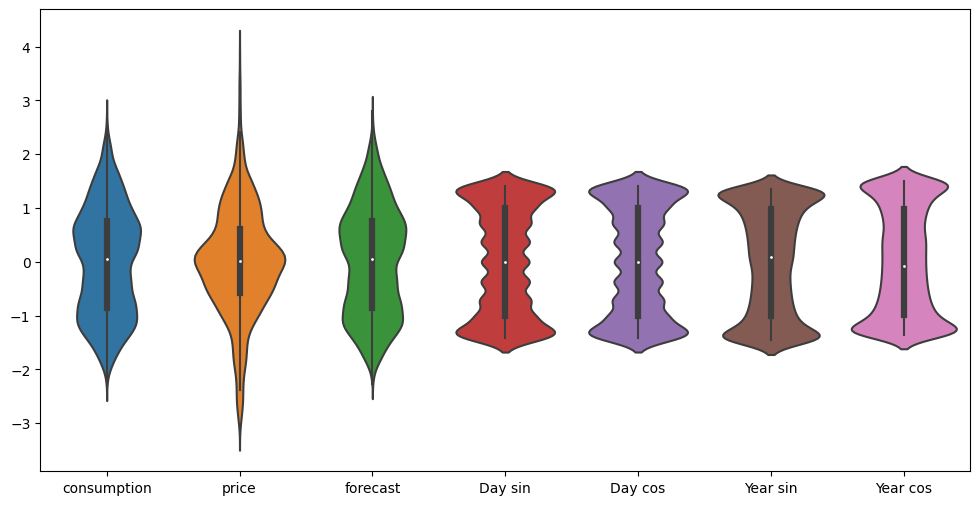

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
ax = sns.violinplot(train_df)
plt.show()

# Calculate metricts for normalization data

In [ ]:
calculate_metrics(train_df['consumption'], train_df['forecast'])


{'Bias': {7.845383042331615e-16},
 'MAE': {0.07304842896786085},
 'MSE': {0.010919707655628356},
 'MAPE': {36.32383284238631},
 'RMSE': {0.10449740501863362},
 'Huber': {0.005308776}}

In [ ]:
train_forecast = train_df.forecast
val_forecast = val_df.forecast
test_forecast = test_df.forecast

train_df.drop('forecast', axis = 'columns', inplace = True)
val_df.drop('forecast',axis = 'columns', inplace = True)
test_df.drop('forecast', axis = 'columns', inplace = True)

## Windowing data

In [ ]:
class WindowGenerator():
  def __init__(self, window_width, horizon_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_column=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_column = label_column
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.label_column_index = None
    if label_column is not None:
      self.label_column_index = self.column_indices[self.label_column]

    # Work out the window parameters.
    self.window_width = window_width
    self.horizon_width = horizon_width
    self.shift = shift

    self.total_window_size = window_width + self.shift

    self.input_slice = slice(0, window_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.horizon_width
    self.label_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.label_slice]


  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name: {self.label_column}',
        f'Label column index:{self.label_column_index}'])



In [ ]:
w1 = WindowGenerator(window_width=3, horizon_width=1, shift=1)
w1

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name: None
Label column index:None

In [ ]:
w1 = WindowGenerator(window_width=5, horizon_width=1, shift=2)
w1

Total window size: 7
Input indices: [0 1 2 3 4]
Label indices: [6]
Label column name: None
Label column index:None

In [ ]:
w1 = WindowGenerator(window_width=6, horizon_width=1, shift=2)
w1

Total window size: 8
Input indices: [0 1 2 3 4 5]
Label indices: [7]
Label column name: None
Label column index:None

In [ ]:
# makes windowed dataset
def make_dataset(self, data, batch_size=32, shuffle = False, shuffle_buffer = None ):
  dataset = tf.data.Dataset.from_tensor_slices(data)
  dataset = dataset.window(self.total_window_size, 1, drop_remainder=True)
  dataset = dataset.flat_map(lambda w: w.batch(self.total_window_size))
  if shuffle:
    dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.map(lambda w:(w[:self.window_width], w[-self.horizon_width:,self.label_column_index]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df, shuffle = True, shuffle_buffer = 1000)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
def plot(self, model=None, max_subplots=3):
  inputs, labels = self.example

  plt.figure(figsize=(12, 8))
  #print(len(inputs))
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.grid(True)
    plt.ylabel(f'{self.label_column}')
    #print(self.input_indices)
    #print(inputs[n, :, self.label_column_index].shape)
    plt.plot(self.input_indices, inputs[n, :, self.label_column_index],
             label='Inputs', marker='.', zorder=-10)

    plt.scatter(self.label_indices, labels[n, :],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      #print(self.label_indices)
      #print(predictions[n, :].shape)
      plt.scatter(self.label_indices, predictions[n, :],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
    if n == 0:
      plt.legend()
  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
'''
The procedure to use separately from class...
'''
def windowed_dataset(series, label_col_index, window_size, horizon_size, batch_size, shuffle = False, shuffle_buffer = None):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + horizon_size, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + horizon_size))
  if shuffle:
    dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.map(lambda window: (window[:-horizon_size], window[-horizon_size:,label_col_index]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset


# Create the model
The model predict next 24 hours using 48 hours before

window = 48, horizon = 24


In [ ]:
WINDOW_SIZE = 48
HORIZON_SIZE = 24
FEATURES = 6

In [ ]:
window_data = WindowGenerator(
    window_width=48, horizon_width=24, shift=24,
    label_column='consumption')
window_data

Total window size: 72
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Label column name: consumption
Label column index:0

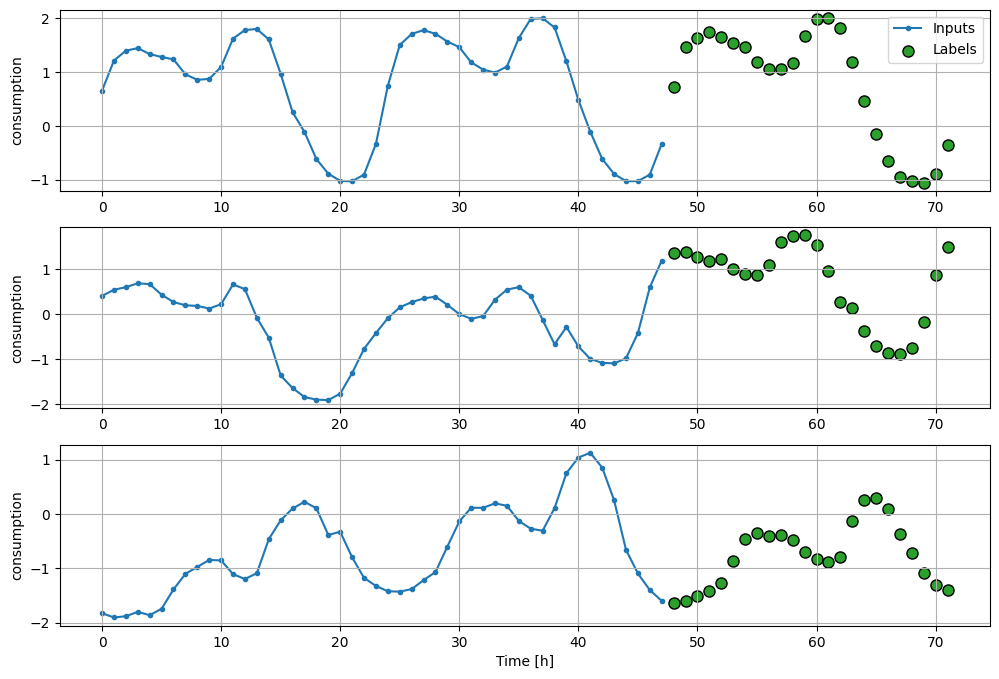

In [ ]:
window_data.plot()

## Baseline
A simple baseline for this task is to repeat the last input time step for the required number of output time steps

In [ ]:
class BaseModel(tf.keras.Model):
  def __init__(self, horizon_width, label_index):
    super().__init__()
    self.label_index = label_index
    self.horizon_width = horizon_width

  def call(self, inputs):
    return inputs[:,:self.horizon_width,self.label_index]

In [ ]:
base_model = BaseModel(horizon_width = 24, label_index=0)
base_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
pred = base_model.predict(window_data.test)

108/108 [==============================] - 2s 17ms/step


In [ ]:
pred.shape

(3436, 24)

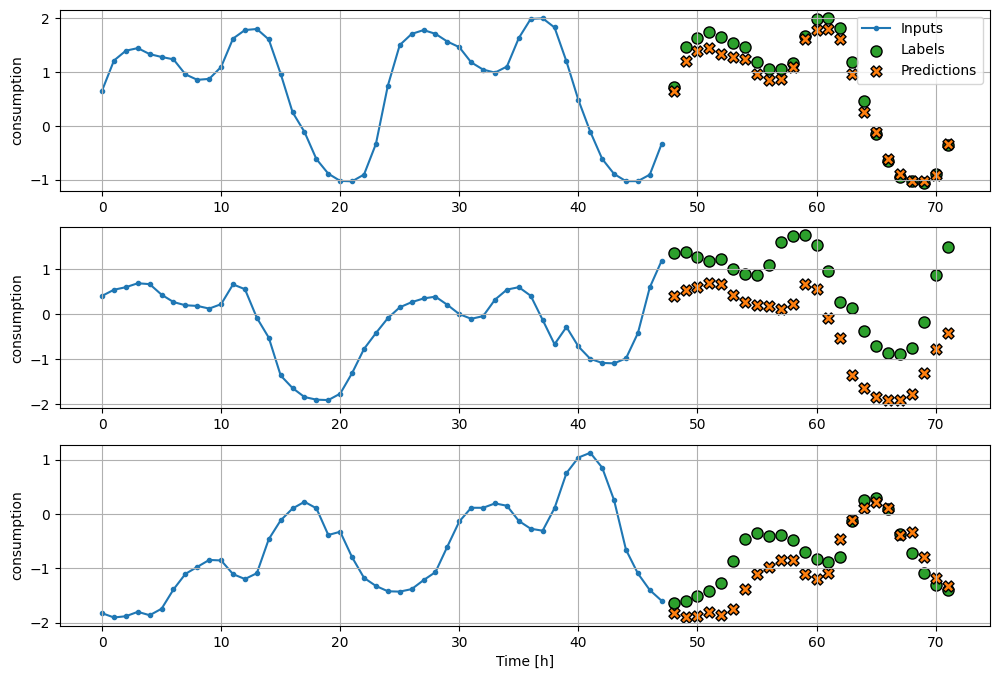

In [ ]:
window_data.plot(base_model)

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = base_model.evaluate(window_data.val)
performance['Baseline'] = base_model.evaluate(window_data.test, verbose=0)

217/217 [==============================] - 2s 9ms/step - loss: 1.0057 - mean_absolute_error: 0.7569


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, windowed_data_set, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(windowed_data_set.train, epochs=MAX_EPOCHS,
                      validation_data=windowed_data_set.val,
                      callbacks=[early_stopping])
  return history

## Dense model DDN

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
dense_model = tf.keras.Sequential([
    Flatten(input_shape=(WINDOW_SIZE, FEATURES)),
    Dense(128, 'relu'),
    Dense(64, 'relu'),
    Dense(HORIZON_SIZE)])

In [ ]:
dense_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               36992     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 24)                1560      
                                                                 
Total params: 46,808
Trainable params: 46,808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dense_history = compile_and_fit(dense_model, window_data, 2)

Epoch 1/20
765/765 [==============================] - 39s 18ms/step - loss: 0.3193 - mean_absolute_error: 0.4198 - val_loss: 0.3051 - val_mean_absolute_error: 0.4204
Epoch 2/20
765/765 [==============================] - 13s 17ms/step - loss: 0.2391 - mean_absolute_error: 0.3608 - val_loss: 0.2775 - val_mean_absolute_error: 0.4003
Epoch 3/20
765/765 [==============================] - 23s 29ms/step - loss: 0.2202 - mean_absolute_error: 0.3432 - val_loss: 0.2636 - val_mean_absolute_error: 0.3765
Epoch 4/20
765/765 [==============================] - 14s 18ms/step - loss: 0.2104 - mean_absolute_error: 0.3347 - val_loss: 0.2565 - val_mean_absolute_error: 0.3727
Epoch 5/20
765/765 [==============================] - 15s 19ms/step - loss: 0.2021 - mean_absolute_error: 0.3259 - val_loss: 0.2475 - val_mean_absolute_error: 0.3638
Epoch 6/20
765/765 [==============================] - 14s 18ms/step - loss: 0.1929 - mean_absolute_error: 0.3174 - val_loss: 0.2339 - val_mean_absolute_error: 0.3508
Epoc

<Axes: >

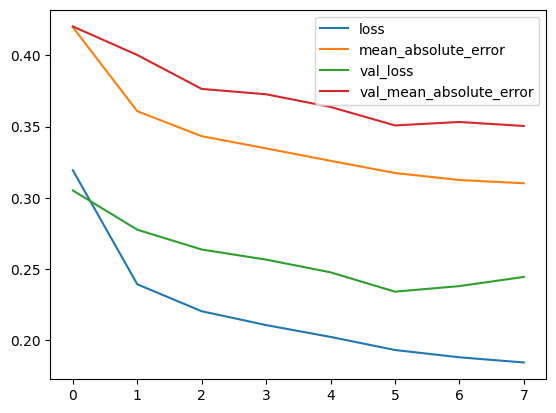

In [ ]:
pd.DataFrame(dense_history.history).plot()

In [ ]:
val_performance['Dense'] = dense_model.evaluate(window_data.val)
performance['Dense'] = dense_model.evaluate(window_data.test, verbose=0)

217/217 [==============================] - 2s 9ms/step - loss: 0.2443 - mean_absolute_error: 0.3504


In [ ]:
performance

{'Baseline': [0.8399728536605835, 0.6983988881111145],
 'Dense': [0.22489769756793976, 0.33477702736854553]}

In [ ]:
val_performance

{'Baseline': [1.0057098865509033, 0.7568948268890381],
 'Dense': [0.24430139362812042, 0.3504272997379303]}

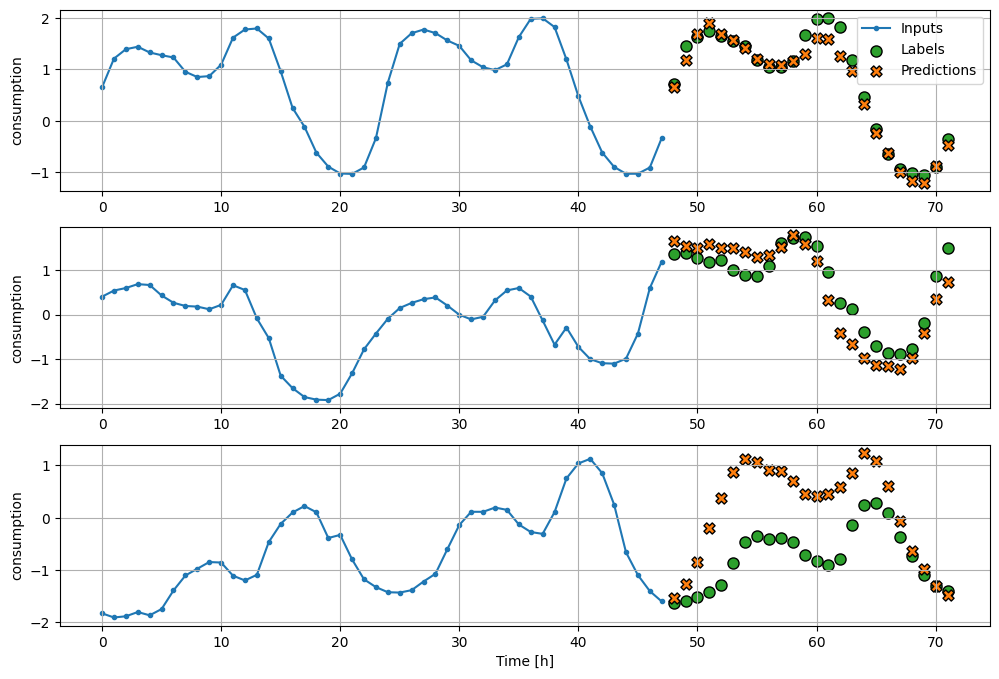

In [ ]:
window_data.plot(dense_model)

## Convolution model CNN

In [ ]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[WINDOW_SIZE, FEATURES]),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(HORIZON_SIZE, 'linear')
  ])


In [ ]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 128)           3968      
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 24)                1560      
                                                                 
Total params: 13,784
Trainable params: 13,784
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_history = compile_and_fit(cnn_model, window_data, 2)

Epoch 1/20
765/765 [==============================] - 20s 17ms/step - loss: 0.5080 - mean_absolute_error: 0.5575 - val_loss: 0.4776 - val_mean_absolute_error: 0.5437
Epoch 2/20
765/765 [==============================] - 13s 16ms/step - loss: 0.3386 - mean_absolute_error: 0.4470 - val_loss: 0.3878 - val_mean_absolute_error: 0.4798
Epoch 3/20
765/765 [==============================] - 11s 14ms/step - loss: 0.3013 - mean_absolute_error: 0.4201 - val_loss: 0.3399 - val_mean_absolute_error: 0.4436
Epoch 4/20
765/765 [==============================] - 16s 21ms/step - loss: 0.2804 - mean_absolute_error: 0.4047 - val_loss: 0.3332 - val_mean_absolute_error: 0.4415
Epoch 5/20
765/765 [==============================] - 14s 18ms/step - loss: 0.2618 - mean_absolute_error: 0.3898 - val_loss: 0.3137 - val_mean_absolute_error: 0.4211
Epoch 6/20
765/765 [==============================] - 13s 17ms/step - loss: 0.2504 - mean_absolute_error: 0.3799 - val_loss: 0.3270 - val_mean_absolute_error: 0.4289
Epoc

<Axes: >

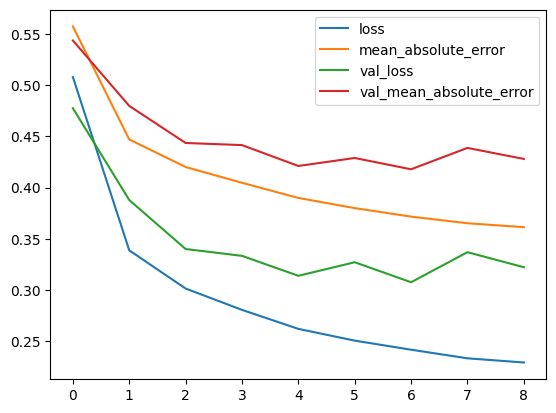

In [ ]:
pd.DataFrame(cnn_history.history).plot()

In [ ]:
val_performance['CNN'] = cnn_model.evaluate(window_data.val)
performance['CNN'] = cnn_model.evaluate(window_data.test, verbose=0)

217/217 [==============================] - 2s 9ms/step - loss: 0.3221 - mean_absolute_error: 0.4280


In [ ]:
performance

{'Baseline': [0.8399728536605835, 0.6983988881111145],
 'Dense': [0.22489769756793976, 0.33477702736854553],
 'CNN': [0.29603829979896545, 0.40735939145088196]}

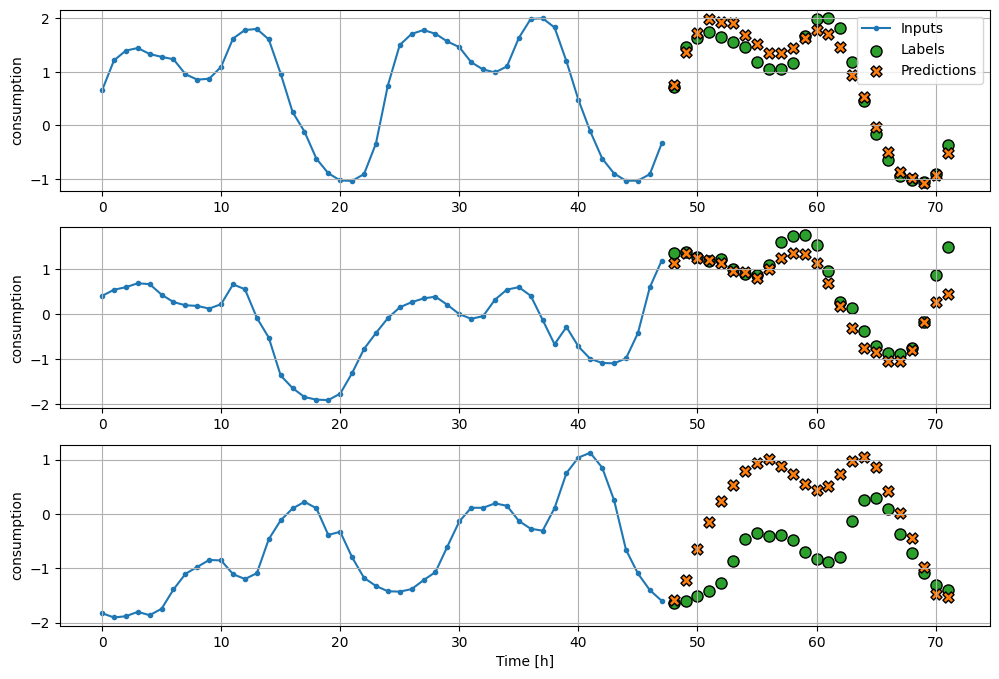

In [ ]:
window_data.plot(cnn_model)


## LSTM model

In [162]:
# create LSTM model

lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[WINDOW_SIZE, FEATURES]),
  tf.keras.layers.LSTM(64, return_sequences=False, input_shape=[WINDOW_SIZE, FEATURES]),
  tf.keras.layers.Dense(HORIZON_SIZE, 'linear')
  ])
lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 48, 128)           69120     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 24)                1560      
                                                                 
Total params: 120,088
Trainable params: 120,088
Non-trainable params: 0
_________________________________________________________________


In [164]:
lspm_history = compile_and_fit(lstm_model, window_data, 5)


Epoch 1/20
765/765 [==============================] - 23s 25ms/step - loss: 0.2201 - mean_absolute_error: 0.3432 - val_loss: 0.2441 - val_mean_absolute_error: 0.3674
Epoch 2/20
765/765 [==============================] - 20s 26ms/step - loss: 0.1840 - mean_absolute_error: 0.3097 - val_loss: 0.2256 - val_mean_absolute_error: 0.3419
Epoch 3/20
765/765 [==============================] - 18s 23ms/step - loss: 0.1630 - mean_absolute_error: 0.2882 - val_loss: 0.2358 - val_mean_absolute_error: 0.3404
Epoch 4/20
765/765 [==============================] - 19s 24ms/step - loss: 0.1430 - mean_absolute_error: 0.2688 - val_loss: 0.2422 - val_mean_absolute_error: 0.3423
Epoch 5/20
765/765 [==============================] - 18s 23ms/step - loss: 0.1272 - mean_absolute_error: 0.2526 - val_loss: 0.2205 - val_mean_absolute_error: 0.3222
Epoch 6/20
765/765 [==============================] - 18s 23ms/step - loss: 0.1110 - mean_absolute_error: 0.2361 - val_loss: 0.2267 - val_mean_absolute_error: 0.3290
Epoc

In [165]:
val_performance['LSTM'] = lstm_model.evaluate(window_data.val)
performance['LSTM'] = lstm_model.evaluate(window_data.test, verbose=0)

217/217 [==============================] - 4s 20ms/step - loss: 0.2587 - mean_absolute_error: 0.3384


In [166]:
val_performance

{'Baseline': [1.0057098865509033, 0.7568948268890381],
 'Dense': [0.24430139362812042, 0.3504272997379303],
 'CNN': [0.32211270928382874, 0.4279695451259613],
 'LSTM': [0.2587072253227234, 0.33843982219696045]}

In [167]:
performance

{'Baseline': [0.8399728536605835, 0.6983988881111145],
 'Dense': [0.22489769756793976, 0.33477702736854553],
 'CNN': [0.29603829979896545, 0.40735939145088196],
 'LSTM': [0.23416559398174286, 0.3391622006893158]}

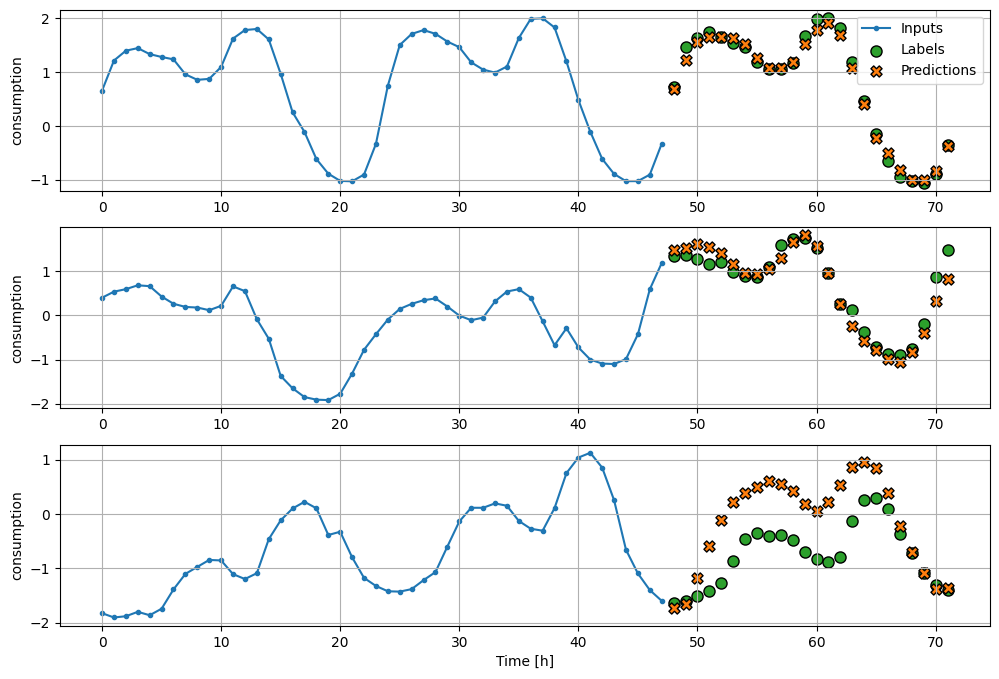

In [186]:
window_data.plot(lstm_model)


## Create forecast

In [243]:
test=test_df.tail(WINDOW_SIZE+HORIZON_SIZE)

In [244]:
test.shape


(72, 6)

In [245]:
test.head()

,consumption,price,Day sin,Day cos,Year sin,Year cos
34992,-0.626867,0.710196,-0.366421,1.365958,-0.125781,1.505982
34993,-1.086929,0.339424,-0.000379,1.414142,-0.124775,1.506033
34994,-1.417591,0.025639,0.365663,1.365958,-0.123770,1.506084
34995,-1.583804,-0.032756,0.706760,1.224689,-0.122764,1.506133
34996,-1.646409,-0.086226,0.999667,0.999964,-0.121758,1.506182


In [246]:
x = test[:WINDOW_SIZE]

In [247]:
w_x = tf.constant(x)
w_x = tf.expand_dims(w_x, axis=0)
w_x.shape

TensorShape([1, 48, 6])

In [259]:
dnn_predict = dense_model.predict(w_x)
cnn_predict = cnn_model.predict(w_x)
lstm_predict = lstm_model.predict(w_x)


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 23ms/step


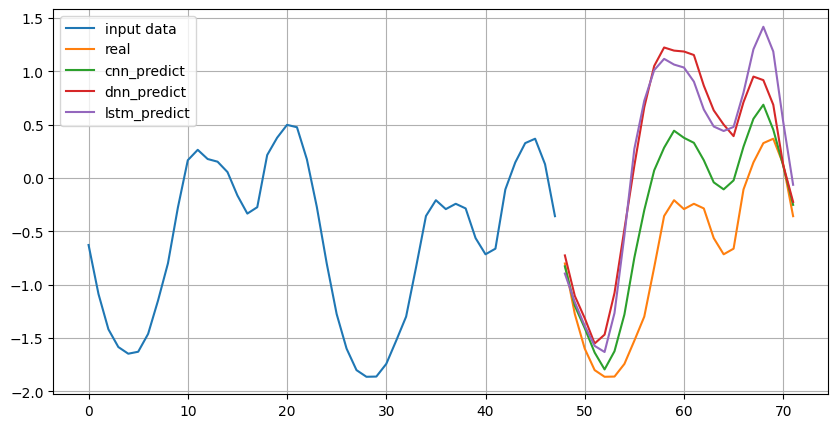

In [267]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(WINDOW_SIZE),x.consumption, label = 'input data')
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),x.tail(HORIZON_SIZE).consumption, label = 'real')
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),cnn_predict.reshape(-1), label='cnn_predict' )
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),dnn_predict.reshape(-1), label='dnn_predict' )
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),lstm_predict.reshape(-1), label='lstm_predict' )

plt.legend()
plt.grid(True)
plt.show()


In [289]:
# denornalizate data
dnn_predict_val = dnn_predict*train_std.consumption + train_mean.consumption
cnn_predict = cnn_predict*train_std.consumption + train_mean.consumption
lstm_predict = lstm_predict*train_std.consumption + train_mean.consumption

In [297]:
multivar_df[-(WINDOW_SIZE+HORIZON_SIZE) :-HORIZON_SIZE].shape

(48, 7)

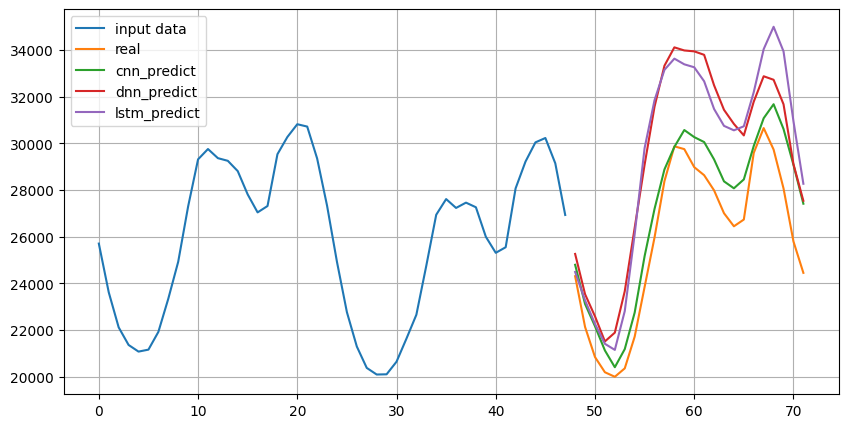

In [299]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(WINDOW_SIZE),multivar_df[-(WINDOW_SIZE+HORIZON_SIZE) :-HORIZON_SIZE].consumption, label = 'input data')
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),multivar_df.tail(HORIZON_SIZE).consumption, label = 'real')
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),cnn_predict.reshape(-1), label='cnn_predict' )
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),dnn_predict_val.reshape(-1), label='dnn_predict' )
plt.plot(np.arange(WINDOW_SIZE,WINDOW_SIZE+HORIZON_SIZE),lstm_predict.reshape(-1), label='lstm_predict' )

plt.legend()
plt.grid(True)
plt.show()

In [301]:
performance

{'Baseline': [0.8399728536605835, 0.6983988881111145],
 'Dense': [0.22489769756793976, 0.33477702736854553],
 'CNN': [0.29603829979896545, 0.40735939145088196],
 'LSTM': [0.23416559398174286, 0.3391622006893158]}

In [315]:
val_performance


{'Baseline': [1.0057098865509033, 0.7568948268890381],
 'Dense': [0.24430139362812042, 0.3504272997379303],
 'CNN': [0.32211270928382874, 0.4279695451259613],
 'LSTM': [0.2587072253227234, 0.33843982219696045]}

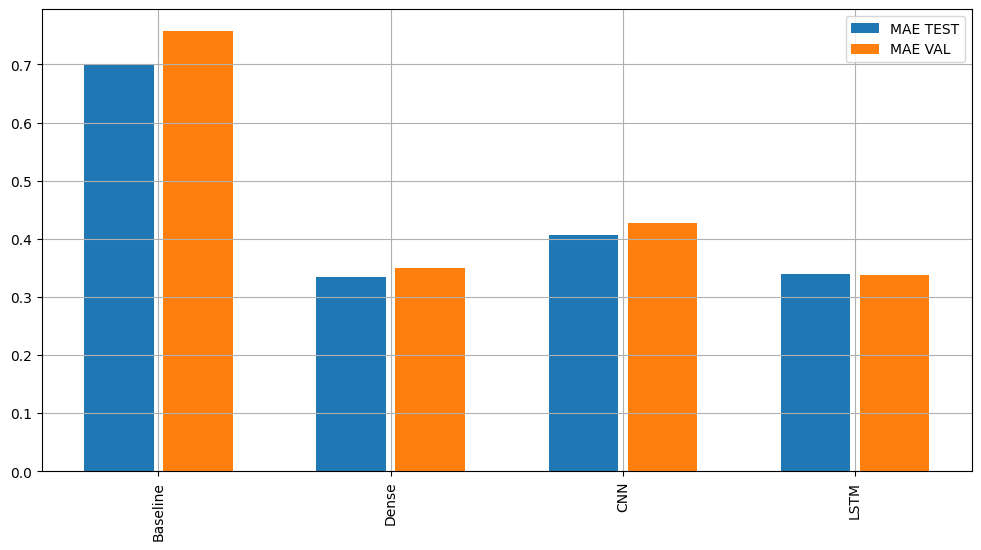

In [314]:
meas = [v[1] for v in performance.values()]
val_meas = [v[1] for v in val_performance.values()]
x = np.arange(len(performance))
plt.figure(figsize=(12, 6))
plt.bar(x- 0.17,meas, width = 0.3, label = 'MAE TEST')
plt.bar(x+ 0.17,val_meas, width = 0.3, label = 'MAE VAL')
plt.xticks(x, performance.keys(), rotation=90)
plt.legend()
plt.grid(True)
plt.show()